In [321]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

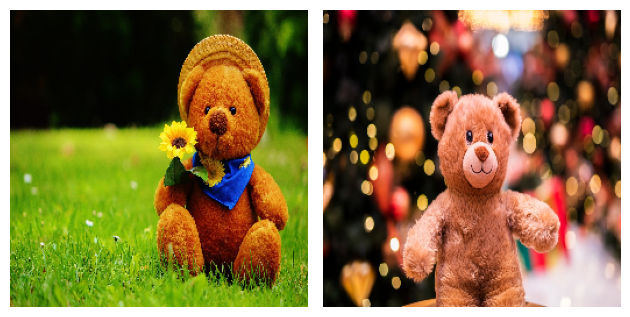

In [322]:
def process_bear(path):
    img_data = []

    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (SIZE, SIZE))
    img_data.append(img_to_array(img))
    img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
    img_array = img_array.astype("float32") / 255
    return img, img_array

def plot_images(images):
    image_count = len(images)
    for i in range(image_count):
        plt.subplot(1, image_count, i+1)
        plt.imshow(images[i])
        plt.axis(False)
    plt.tight_layout()
    plt.show()


SIZE = 256
img, img_array = process_bear("../../Data/Temp/bear.jpg")
img2, img_array2 = process_bear("../../Data/Temp/bear2.jpg")
plot_images([img, img2])

In [323]:
img.shape

(256, 256, 3)

In [324]:

autoencoder = Sequential([
    #Flatten(input_shape=(SIZE, SIZE, 3)),
    #Dense(32, activation="relu"),
    #Dense(SIZE * SIZE * 3, activation="sigmoid"),
    #Reshape((SIZE, SIZE, 3))

    # Encoder
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(SIZE, SIZE, 3)),
    MaxPooling2D((2, 2), padding="same"),
    Conv2D(8, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),
    Conv2D(8, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),
    
    # Decoder
    Conv2D(8, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),
    Conv2D(8, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation="relu", padding="same"),
])
autoencoder.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
autoencoder.summary()

c:\Users\kiran\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_18 (UpSampling2D) │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_19 (UpSampling2D) │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 128, 128, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_20 (UpSampling2D) │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6413 - loss: 0.1386
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6475 - loss: 0.1165
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6487 - loss: 0.0904
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6489 - loss: 0.0641
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6492 - loss: 0.0468
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6491 - loss: 0.0490
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6489 - loss: 0.0505
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6423 - loss: 0.0413
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6252 - loss: 0.0312
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5485 - loss: 0.0267
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3638 - loss: 0.0271
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0..1.184082].


(-0.5, 255.5, 255.5, -0.5)

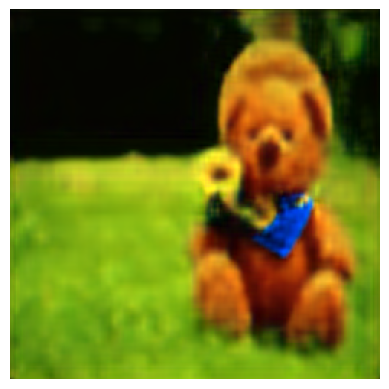

In [325]:
log = autoencoder.fit(img_array, img_array, epochs=300, shuffle=True, verbose=1)
compressed_img = autoencoder.predict(img_array)

plt.imshow(compressed_img[0])
plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0..1.184082].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0..1.2254539].


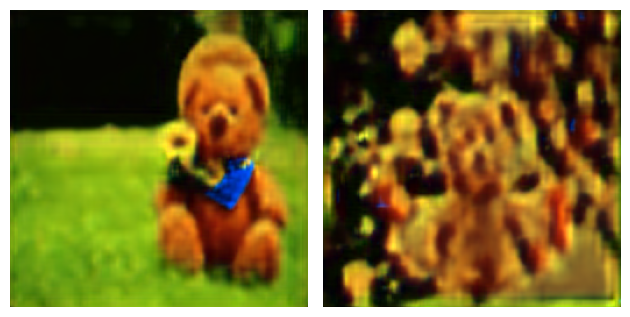

In [326]:
compressed_img = autoencoder.predict(img_array)
compressed_img2 = autoencoder.predict(img_array2)

plot_images([compressed_img[0], compressed_img2[0]])

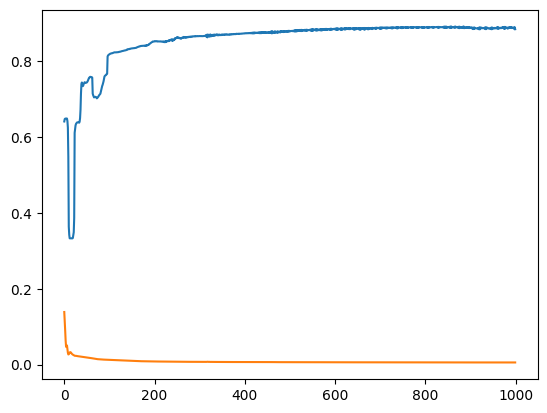

In [328]:
log.__dict__.keys()
#log.history.keys()
plt.plot(log.history["accuracy"])
plt.plot(log.history["loss"])